In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import glob
import shutil
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [2]:
#descargar y descomprimir base de datos
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

In [3]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [5]:
#crear las carpetas de entrenamiento y test
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))
    
    



roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [6]:
#el carpeteo

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


train_daisy_dir = os.path.join(train_dir, 'daisy') 
train_dandelion_dir = os.path.join(train_dir, 'dandelion')
train_roses_dir = os.path.join(train_dir, 'roses') 
train_sunflowers_dir = os.path.join(train_dir, 'sunflowers')  
train_tulips_dir = os.path.join(train_dir, 'tulips') 


val_daisy_dir = os.path.join(val_dir, 'daisy') 
val_dandelion_dir = os.path.join(val_dir, 'dandelion')
val_roses_dir = os.path.join(val_dir, 'roses') 
val_sunflowers_dir = os.path.join(val_dir, 'sunflowers')  
val_tulips_dir = os.path.join(val_dir, 'tulips') 


#numeros
num_daisy_tr = len(os.listdir(train_daisy_dir))
num_dandelion_tr = len(os.listdir(train_dandelion_dir))
num_roses_tr = len(os.listdir(train_roses_dir))
num_sunflowers_tr = len(os.listdir(train_sunflowers_dir))
num_tulips_tr = len(os.listdir(train_tulips_dir))

num_daisy_v = len(os.listdir(val_daisy_dir))
num_dandelion_v = len(os.listdir(val_dandelion_dir))
num_roses_v = len(os.listdir(val_roses_dir))
num_sunflowers_v = len(os.listdir(val_sunflowers_dir))
num_tulips_v = len(os.listdir(val_tulips_dir))


total_train = num_daisy_tr + num_dandelion_tr + num_roses_tr + num_sunflowers_tr + num_tulips_tr
total_val = num_daisy_v + num_dandelion_v + num_roses_v + num_sunflowers_v + num_tulips_v
 


In [7]:
#augmentación para set de entrenamiento 
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=100,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(150,150),
                                                     class_mode='binary')


Found 2935 images belonging to 5 classes.


In [8]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=100,
                                                 directory=val_dir,
                                                 target_size=(150, 150),
                                                 class_mode='binary')

Found 735 images belonging to 5 classes.


In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(5,activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 128)      

In [13]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(100))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(100)))
)

Train for 30 steps, validate for 8 steps
Epoch 1/100
30/30 [==============================] - 42s 1s/step - loss: 1.5476 - accuracy: 0.3404 - val_loss: 1.4335 - val_accuracy: 0.4653
Epoch 2/100
30/30 [==============================] - 43s 1s/step - loss: 1.4467 - accuracy: 0.4525 - val_loss: 1.3908 - val_accuracy: 0.5048
Epoch 3/100
30/30 [==============================] - 41s 1s/step - loss: 1.3990 - accuracy: 0.4988 - val_loss: 1.3376 - val_accuracy: 0.5578
Epoch 4/100
30/30 [==============================] - 41s 1s/step - loss: 1.3607 - accuracy: 0.5390 - val_loss: 1.3078 - val_accuracy: 0.5973
Epoch 5/100
30/30 [==============================] - 45s 2s/step - loss: 1.3414 - accuracy: 0.5588 - val_loss: 1.3015 - val_accuracy: 0.6014
Epoch 6/100
30/30 [==============================] - 44s 1s/step - loss: 1.3251 - accuracy: 0.5738 - val_loss: 1.2989 - val_accuracy: 0.6095
Epoch 7/100
30/30 [==============================] - 42s 1s/step - loss: 1.3355 - accuracy: 0.5598 - val_loss: 1.

30/30 [==============================] - 41s 1s/step - loss: 1.1546 - accuracy: 0.7431 - val_loss: 1.1616 - val_accuracy: 0.7374
Epoch 59/100
30/30 [==============================] - 41s 1s/step - loss: 1.1668 - accuracy: 0.7319 - val_loss: 1.1402 - val_accuracy: 0.7565
Epoch 60/100
30/30 [==============================] - 41s 1s/step - loss: 1.1707 - accuracy: 0.7281 - val_loss: 1.2005 - val_accuracy: 0.7048
Epoch 61/100
30/30 [==============================] - 41s 1s/step - loss: 1.1808 - accuracy: 0.7162 - val_loss: 1.1968 - val_accuracy: 0.6952
Epoch 62/100
30/30 [==============================] - 42s 1s/step - loss: 1.1506 - accuracy: 0.7509 - val_loss: 1.1500 - val_accuracy: 0.7415
Epoch 63/100
30/30 [==============================] - 41s 1s/step - loss: 1.1507 - accuracy: 0.7520 - val_loss: 1.1392 - val_accuracy: 0.7551
Epoch 64/100
30/30 [==============================] - 41s 1s/step - loss: 1.1529 - accuracy: 0.7475 - val_loss: 1.1485 - val_accuracy: 0.7469
Epoch 65/100
30/30 

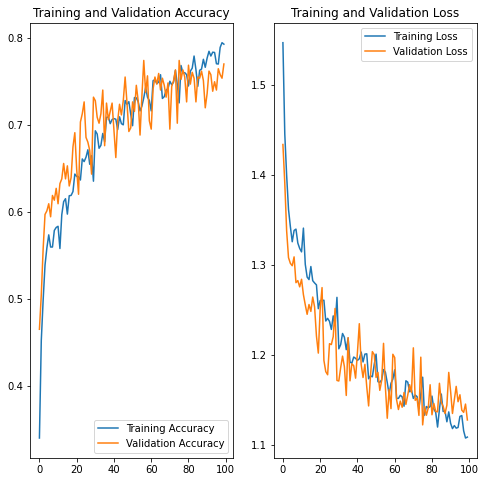

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()